# An overview about the environment of most popular universities in sfax, Tunisia

#### Capstone Project - Sfax universities
#### 29 december 2019
### 1. A description of the problem
Many centers of research try to understand why there is big difference between scores of success and motivation of students between various universities in my city  Sfax, Tunisia
### 2.Idea of this work: 
To do so, I propose in this report to understand the environment of the most popular universities in sfax in order to evaluate this factor. So in this work, I will study the neighbors venues of each university, coffee, restaurant, sport center, ect... This study will change many strategies of minister of education and also many people that have idea to open a coffee, restaurant or sport center. 
### 3.Description of the data
Then I extract information about universities of sfax from https://en.wikipedia.org/wiki/University_of_Sfax and i search latitudes and longitudes from https://www.coordonnees-gps.fr/carte/pays/TN. I construct manually a data frame about 9 universities: data =  Faculty of Medicine National Engineering School(ENIS), Institute of Multimedia (ISIMSF), Institute of High Business Studies(IHEC), Preparatory Institute (IPEIS), Faculty of Economics and Management (FSEG), Higher Institute of Technological Studies(ISET), Higher Institute of Arts and Crafts, Polytechnique Sfax(IPSAS)

### 3. Methodology
#### 3.1 Number of venues
Using foursquare API, I wil extract all venues that are near to each universities. I calculate for each university the number of near venues. I plot a bar figures for that. I remark that there is big difference between number of near venues as shwon below.

#### 3.2  Category of venues
I also extract the category of each venue. 
Next, I change the name of categories as they are very similar. I organize the data frame to have a category in following group: Coffee, Shop, Sport, Restaurant and Leisure space

#### 3.3 Comptuing frequency of each category and results
I compute the frequency of each venue just near the university. For each university, I ouput the most frequent category as followwing:

# In the following, I present the scripting and my work then, I will add a part of discussion.

In [326]:
#!pip install geopy
# !conda install -c conda-forge folium=0.5.0 --yes 
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from geopy.geocoders import Nominatim 
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
%matplotlib inline 
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
import folium # map rendering library


In [327]:
data = [['Faculty of Medicine', 34.73794487388853, 10.75136661529541], 
        ['National Engineering School(ENIS)', 34.7262332, 10.7175152], 
        ['Institute of Multimedia (ISIMSF)',34.83955534469027, 10.757267475128174],
        ['Institute of High Business Studies(IHEC)', 34.7938346, 10.837256],
        ['Preparatory Institute (IPEIS)', 34.73688687490024, 10.748448371887207],
        ['Faculty of Economics and Management (FSEG)',34.73445342581831, 10.70991039276123],
        ['Higher Institute of Technological Studies(ISET)',34.7573643, 10.7724747],
       ['Higher Institute of Arts and Crafts',34.747483886327764,10.761966705322266],
       ['Polytechnique Sfax(IPSAS)',34.74625410322714, 10.761677026748657]]
sfax_data = pd.DataFrame(data, columns = ['University','Latitude','Longitude'])
sfax_data

,University,Latitude,Longitude
0,Faculty of Medicine,34.737945,10.751367
1,National Engineering School(ENIS),34.726233,10.717515
2,Institute of Multimedia (ISIMSF),34.839555,10.757267
3,Institute of High Business Studies(IHEC),34.793835,10.837256
4,Preparatory Institute (IPEIS),34.736887,10.748448
5,Faculty of Economics and Management (FSEG),34.734453,10.709910
6,Higher Institute of Technological Studies(ISET),34.757364,10.772475
7,Higher Institute of Arts and Crafts,34.747484,10.761967
8,Polytechnique Sfax(IPSAS),34.746254,10.761677


In [328]:
# Localise Lieux on the map Paris
address = 'sfax La Médina, Tunisia'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Sfax are {}, {}.'.format(latitude, longitude))
# create map of Sfax using latitude and longitude values
map_sfax = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, label in zip(sfax_data['Latitude'], sfax_data['Longitude'], sfax_data['University']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=17,
        popup=label,
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5,
        parse_html=False).add_to(map_sfax)  
    
map_sfax

The geograpical coordinate of Sfax are 34.739739, 10.7598516.


In [329]:
CLIENT_ID = 'CLX1TONZPXOYPJ144OBKTUDFOEN4MC5YPPP2H1FKATHMFPN4' # your Foursquare ID
CLIENT_SECRET = 'RQJK2PF3X5Y5MFOTUYZCKVYQO52S3FEOGRM5IF23A1F5OMTO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=100

def getNearbyVenues(names, latitudes, longitudes, radius=1200):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['University', 
                  'University Latitude', 
                  'University Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

sfax_data_venues = getNearbyVenues(names=sfax_data['University'],
                                   latitudes=sfax_data['Latitude'],
                                   longitudes=sfax_data['Longitude']
                                  )
print(sfax_data_venues.shape)
sfax_data_venues.head(15)

Faculty of Medicine
National Engineering School(ENIS)
Institute of Multimedia (ISIMSF)
Institute of High Business Studies(IHEC)
Preparatory Institute (IPEIS)
Faculty of Economics and Management (FSEG)
Higher Institute of Technological Studies(ISET)
Higher Institute of Arts and Crafts
Polytechnique Sfax(IPSAS)
(360, 7)


,University,University Latitude,University Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Faculty of Medicine,34.737945,10.751367,Caffeine 2,34.736791,10.751355,Coffee Shop
1,Faculty of Medicine,34.737945,10.751367,Sandwich BOB +,34.738906,10.750923,Sandwich Place
2,Faculty of Medicine,34.737945,10.751367,Hotel Ibis,34.736240,10.748590,Hotel
3,Faculty of Medicine,34.737945,10.751367,bourgeoise,34.741685,10.755499,Ice Cream Shop
4,Faculty of Medicine,34.737945,10.751367,Sandwich Bob,34.743688,10.746722,Sandwich Place
5,Faculty of Medicine,34.737945,10.751367,Ci Gusta,34.736688,10.751753,Ice Cream Shop
6,Faculty of Medicine,34.737945,10.751367,Joy Juice,34.738519,10.750606,Juice Bar
7,Faculty of Medicine,34.737945,10.751367,Stade Taïeb Mhiri de Sfax,34.733340,10.746105,Soccer Stadium
8,Faculty of Medicine,34.737945,10.751367,Quick cafe,34.737866,10.753539,Café
9,Faculty of Medicine,34.737945,10.751367,Baguette & Baguette Sfax,34.740934,10.757632,Fast Food Restaurant


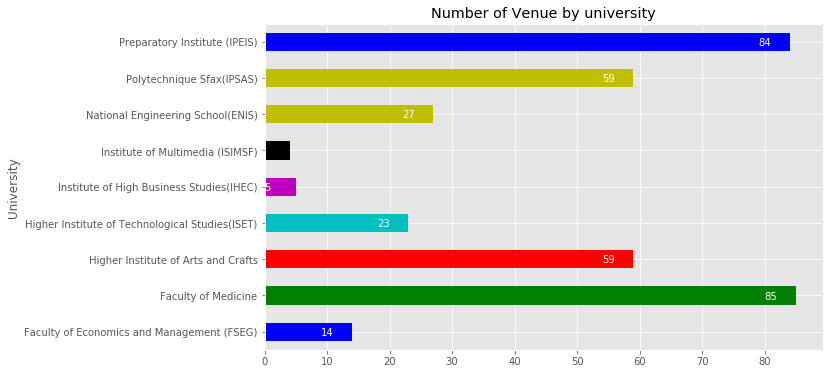

In [330]:
df_view = sfax_data_venues.groupby('University').count()
df_nb_venue = df_view['Venue']
colors = ['b', 'g', 'r', 'c', 'm', 'k', 'y','y']
df_nb_venue.plot(kind='barh', figsize=(10,6),color=colors)

plt.title('Number of Venue by university') # add title to the plot

for index, value in enumerate(df_nb_venue): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value - 5, index - 0.10), color='white')
    
plt.show()

In [331]:
#Let's find out how many unique categories can be curated from all the returned venues¶
print('There are {} uniques categories.'.format(len(sfax_data_venues['Venue Category'].unique())))
print(sfax_data_venues['Venue Category'].unique())

There are 64 uniques categories.
['Coffee Shop' 'Sandwich Place' 'Hotel' 'Ice Cream Shop' 'Juice Bar'
 'Soccer Stadium' 'Café' 'Fast Food Restaurant' 'Cupcake Shop'
 'Historic Site' 'Tea Room' 'Fish Market' 'Steakhouse'
 'Seafood Restaurant' 'American Restaurant' 'Restaurant'
 'Department Store' 'Creperie' 'Pizza Place' 'Mediterranean Restaurant'
 'Middle Eastern Restaurant' 'Park' 'Theater' 'Fish & Chips Shop'
 'Bed & Breakfast' 'Diner' 'Neighborhood' 'Breakfast Spot'
 'Electronics Store' 'Big Box Store' 'Market' 'Resort' 'Mobile Phone Shop'
 'Bistro' 'Zoo' 'Cafeteria' 'Gym / Fitness Center' 'Bookstore' 'Garden'
 'Italian Restaurant' 'Soccer Field' 'Gym' 'Clothing Store' 'Bike Trail'
 'Tennis Court' 'Sports Club' 'Bakery' 'Coworking Space' 'Food Court'
 'Hookah Bar' "Men's Store" "Women's Store" 'Convenience Store' 'Plaza'
 'Furniture / Home Store' 'Boat or Ferry' 'Smoke Shop'
 'Health & Beauty Service' 'Beach' 'Bank' 'Donut Shop' 'Dessert Shop'
 'Comfort Food Restaurant' 'Afghan Rest

In [339]:
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Restaurant'), 'Venue Category'] = 'Restaurant'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Breakfast'), 'Venue Category'] = 'Restaurant'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Steakhouse'), 'Venue Category'] = 'Restaurant'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Food'), 'Venue Category'] = 'Restaurant'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Pizza'), 'Venue Category'] = 'Restaurant'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Sandwich'), 'Venue Category'] = 'Restaurant'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Diner'), 'Venue Category'] = 'Restaurant'

sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Coffee Shop'), 'Venue Category'] = 'Coffee'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Café'), 'Venue Category'] = 'Coffee'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Cafeteria'), 'Venue Category'] = 'Coffee'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Coffee'), 'Venue Category'] = 'Coffee'

sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Ice Cream Shop','Juice Bar'), 'Venue Category'] = 'Delicious'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Juice Bar'), 'Venue Category'] = 'Delicious'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Creperie'), 'Venue Category'] = 'Delicious'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Tea Room'), 'Venue Category'] = 'Delicious'

sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Shop'), 'Venue Category'] = 'Shop'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Market'), 'Venue Category'] = 'Shop'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Store'), 'Venue Category'] = 'Shop'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('store'), 'Venue Category'] = 'Shop'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Bank'), 'Venue Category'] = 'Shop'

sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Zoo'), 'Venue Category'] = 'Leisure space'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Theater'), 'Venue Category'] = 'Leisure space'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Hotel'), 'Venue Category'] = 'Leisure space'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Park'), 'Venue Category'] = 'Leisure space'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Historic Site'), 'Venue Category'] = 'Leisure space'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Beach'), 'Venue Category'] = 'Leisure space'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Coworking Space'), 'Venue Category'] = 'Leisure space'


sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Gym'), 'Venue Category'] = 'Sport'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Tennis'), 'Venue Category'] = 'Sport'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Soccer'), 'Venue Category'] = 'Sport'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Sport'), 'Venue Category'] = 'Sport'
sfax_data_venues.loc[sfax_data_venues['Venue Category'].str.contains('Garden'), 'Venue Category'] = 'Sport'


# one hot encoding
sfax_onehot = pd.get_dummies(sfax_data_venues[['Venue Category']], prefix="", prefix_sep="")

# add university column back to dataframe
sfax_onehot['University'] = sfax_data_venues['University'] 

# move university column to the first column
fixed_columns = [sfax_onehot.columns[-1]] + list(sfax_onehot.columns[:-1])
sfax_onehot = sfax_onehot[fixed_columns]
sfax_grouped = sfax_onehot.groupby('University').mean().reset_index()

#Let's print each venue along with the top 20 most common venues¶
num_top_venues = 3
axe=[]
for hood in sfax_grouped['University']:
    print("----"+hood+"----")
    temp = sfax_grouped[sfax_grouped['University'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Faculty of Economics and Management (FSEG)----
        venue  freq
0      Coffee  0.57
1       Sport  0.21
2  Restaurant  0.14


----Faculty of Medicine----
        venue  freq
0  Restaurant  0.33
1      Coffee  0.26
2        Shop  0.14


----Higher Institute of Arts and Crafts----
        venue  freq
0  Restaurant  0.39
1        Shop  0.22
2      Coffee  0.20


----Higher Institute of Technological Studies(ISET)----
        venue  freq
0      Coffee  0.26
1  Restaurant  0.22
2        Shop  0.13


----Institute of High Business Studies(IHEC)----
        venue  freq
0      Coffee   0.4
1  Restaurant   0.4
2   Delicious   0.2


----Institute of Multimedia (ISIMSF)----
           venue  freq
0     Restaurant  0.50
1         Coffee  0.25
2  Leisure space  0.25


----National Engineering School(ENIS)----
        venue  freq
0      Coffee  0.48
1  Restaurant  0.22
2       Sport  0.15


----Polytechnique Sfax(IPSAS)----
        venue  freq
0  Restaurant  0.39
1        Shop  0.24
2      Co

# Discusion and conclusion

In our work, I include 9 universities. These results shown the Coffee venue is the most frequent for 4 universities and venue Restaurant for 5 universities. The other frequent venues are shop and sometimes sport. This work can be followed for more details when we have a data about motivation and score of success of each universities. BUT, for such people who is interessted to open a coffee, I will encourage him to open it just near Polytechnique Sfax(IPSAS).